In [ ]:
# !pip install --quiet mediapy
# !pip install robosuite==1.4

In [1]:
from libero.libero import benchmark
from libero.libero.envs import OffScreenRenderEnv
from libero.libero import get_libero_path
import os 
import mediapy

[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python /home/kime/miniconda3/envs/openvla/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (macros.py:55)


In [2]:
def libero_frames(task_suite_name, task_id, resize):

    benchmark_dict = benchmark.get_benchmark_dict()
    task_suite = benchmark_dict[task_suite_name]()

    # retrieve a specific task
    task = task_suite.get_task(task_id)
    task_name = task.name
    task_description = task.language
    task_bddl_file = os.path.join(get_libero_path("bddl_files"), task.problem_folder, task.bddl_file)
    print(f"[info] retrieving task {task_id} from suite {task_suite_name}, the " + \
        f"language instruction is {task_description}, and the bddl file is {task_bddl_file}")

    # step over the environment
    env_args = {
        "bddl_file_name": task_bddl_file,
        "camera_heights": resize,
        "camera_widths": resize
    }
    env = OffScreenRenderEnv(**env_args)
    env.seed(0)
    env.reset()
    init_states = task_suite.get_task_init_states(task_id) # for benchmarking purpose, we fix the a set of initial states
    env.set_init_state(init_states[0])

    dummy_action = [0.] * 7
    replay_images = []

    if task_suite_name == "libero_spatial":
        max_steps = 220  # longest training demo has 193 steps
    elif task_suite_name == "libero_object":
        max_steps = 280  # longest training demo has 254 steps
    elif task_suite_name == "libero_goal":
        max_steps = 300  # longest training demo has 270 steps
    elif task_suite_name == "libero_10":
        max_steps = 520  # longest training demo has 505 steps
    elif task_suite_name == "libero_90":
        max_steps = 400  # longest training demo has 373 steps

    for step in range(max_steps):
        obs, reward, done, info = env.step(dummy_action)
        img = obs["agentview_image"]
        img = img[::-1, ::-1] 
        replay_images.append(img)
    env.close()
    
    return replay_images

In [3]:
# ["libero_spatial", "libero_object", "libero_goal", "libero_10"]
task_suite_name = "libero_spatial" # can also choose libero_spatial, libero_object, etc.
task_id = 0
resize = 512


replay_images = libero_frames(task_suite_name, task_id, resize)

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[Warning]: datasets path /home/kime/ws_openvla/LIBERO/libero/libero/../datasets does not exist!
[info] retrieving task 0 from suite libero_spatial, the language instruction is pick up the black bowl between the plate and the ramekin and place it on the plate, and the bddl file is /home/kime/ws_openvla/LIBERO/libero/libero/./bddl_files/libero_spatial/pick_up_the_black_bowl_between_the_plate_and_the_ramekin_and_place_it_on_the_plate.bddl
[Warning]: datasets path /home/kime/ws_openvla/LIBERO/libero/libero/../datasets does not exist!


In [22]:
images = [img for img in replay_images]
# mediapy.show_video(replay_images, fps=5)
# mediapy.show_video(replay_images, fps=10, codec="h264")

# mediapy.show_video(replay_images, fps=10, codec="h264")

[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[Warning]: datasets path /home/kime/ws_openvla/LIBERO/libero/libero/../datasets does not exist!
[info] retrieving task 1 from suite libero_spatial, the language instruction is pick up the black bowl next to the ramekin and place it on the plate, and the bddl file is /home/kime/ws_openvla/LIBERO/libero/libero/./bddl_files/libero_spatial/pick_up_the_black_bowl_next_to_the_ramekin_and_place_it_on_the_plate.bddl
[Warning]: datasets path /home/kime/ws_openvla/LIBERO/libero/libero/../datasets does not exist!


""

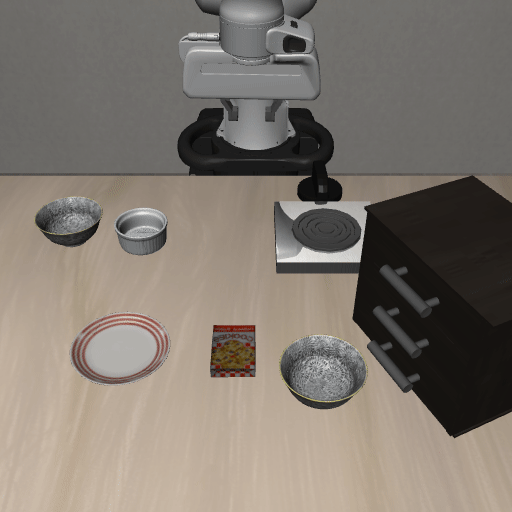

In [5]:
# ["libero_spatial", "libero_object", "libero_goal", "libero_10"]
task_suite_name = "libero_spatial" # can also choose libero_spatial, libero_object, etc.
task_id = 1
resize = 512


replay_images = libero_frames(task_suite_name, task_id, resize)

mediapy.show_video(replay_images, fps=1, codec='gif')

In [18]:
    !command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)

In [8]:
# mediapy.write_video("test.mp4", replay_images, fps=10)

import cv2
import numpy as np

out = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"mp4v"), 30, (resize, resize))
for image in replay_images:
    out.write(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR
out.release()

In [2]:
from IPython.display import Video
import os

# video_path = "output.mp4"
# if os.path.exists(video_path):
#     display(Video(video_path, embed=True, width=resize, height=resize))
# else:
#     print(f"Error: Video file '{video_path}' not found.")

Video("output.mp4", embed=True)

In [22]:
import mediapy as media
import numpy as np

url = 'output.mp4'
video = media.read_video(url)
print(video.shape, video.dtype)  # It is a numpy array.
print(video.metadata.fps)  # The 'metadata' attribute includes framerate.
media.show_video(video)  # Play the video using the retrieved framerate.


(220, 512, 512, 3) uint8
30.0


RuntimeError: Error writing '/tmp/tmpb2lz8tm6/file.mp4': [libopenh264 @ 0x578470bec080] Incorrect library version loaded
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height


In [1]:
from IPython.display import HTML

HTML("""
<video width="{resize}" height="{resize}" controls>
  <source src="output.mp4" type="video/mp4">
</video>
""")


In [16]:
!pip install --quiet moviepy

In [17]:
from moviepy import VideoFileClip
from IPython.display import display

# 비디오 클립 불러오기
clip = VideoFileClip("output.mp4")

# 노트북에서 재생
clip.display_in_notebook(width=512)


{'video_found': True, 'audio_found': False, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'encoder': 'Lavf59.27.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [512, 512], 'bitrate': 500, 'fps': 30.0, 'codec_name': 'mpeg4', 'profile': '(Simple Profile)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 7.33, 'bitrate': 502, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'mpeg4', 'video_profile': '(Simple Profile)', 'video_size': [512, 512], 'video_bitrate': 500, 'video_fps': 30.0, 'video_duration': 7.33, 'video_n_frames': 219}
/home/kime/miniconda3/envs/openvla/lib/python3.10/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux-x86_64-v7.0.2 -i output.mp4 -loglevel error -f image2pipe -vf scale=512:512 -sws_flags bicubic

frame_index:   0%|          | 0/219 [00:00<?, ?it/s, now=None]

MoviePy - Done !
MoviePy - video ready __temp__.mp4
